In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/housepricedata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [4]:
X = data.drop(columns=['OverallCond','AboveMedianPrice'], axis = 1)
y = data['AboveMedianPrice']

In [5]:
#Scale dữ liệu trước khi fit vào mô hình nơ-ron

In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
# Chia dữ liệu cho Training, Validation và Testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size = 0.3, random_state = 42)

In [9]:
# Tiếp tục chia dữ liệu cho Validation và Testing

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size = 0.5, random_state = 42)

In [11]:
# Sau khi hoàn tất việc chia dữ liệu ta sẽ được tỉ lệ dữ liệu như sau:
# 70% mẫu dữ liệu sẽ được đưa vào TRAINING, 30% được chia cho việc VALIDATION và TESTING
# Trong 30% dữ liệu còn lại, 15% sử dụng cho VALIDATION và 15% còn lại sử dụng cho TESTING

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# Xây dựng mô hình
model = Sequential([
    Dense(32, activation='relu', input_shape=(9,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val,y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4987 - loss: 0.7141 - val_accuracy: 0.4749 - val_loss: 0.7032
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5059 - loss: 0.6993 - val_accuracy: 0.5388 - val_loss: 0.6892
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5057 - loss: 0.6873 - val_accuracy: 0.5114 - val_loss: 0.6790
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4910 - loss: 0.6810 - val_accuracy: 0.5160 - val_loss: 0.6710
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 0.6710 - val_accuracy: 0.5114 - val_loss: 0.6643
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 0.6640 - val_accuracy: 0.5205 - val_loss: 0.6583
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 0.6648 - val_accuracy: 0.5205 - val_loss: 0.6527
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5389 - loss: 0.6571 - val_accuracy: 0.5571 - v

In [65]:
model.evaluate(X_test, y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9253 - loss: 0.2240 


0.9041095972061157

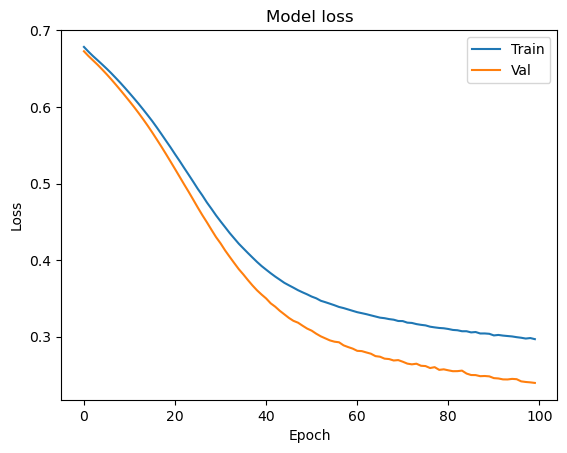

In [68]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()